# METODOLOGIA (LEER, MUY IMPORTANTE)

Este notebook, tiene una metodología de trabajo muy distinta a la usual, el objetivo es que usted escriba el código en los espacios indicados, una vez lo ejecute debe obtener la "Salida esperada:" para corroborar su resultado.

Para saber dónde debe escribir, observe los espacios que dicen ###ESCRIBA SU CÓDIGO AQUÍ###, para saber dónde parar de escribir su código ###TERMINA SU CÓDIGO###.

Así mismo, <b> NO DEBE MODIFICAR LOS NOMBRES DE LAS VARIABLES</b>, solamente los espacios que dicen "None"

# Importar librerías

In [1]:
#Importar librerías
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Funciones útiles para la lectura de imágenes y otros procedimientos.

Recuerde que utilizar estas funciones es opcional, aunque muy sugerido (menos líneas de código)

In [75]:
### UTILIDADES PARA LA LECTURA DE IMÁGENES
#Función de lectura rápida de imágenes a color y en escala de grises
def img_read(filename, mode = 'color'):
    if(mode == 'color'):   
        return cv2.cvtColor(cv2.imread(filename),cv2.COLOR_BGR2RGB)
    elif(mode == 'grayscale' or mode == 'greyscale' or mode == 'gray' or mode == 'grey'):
        return cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    else:
        return None

    #Función para interpolar los puntos entre 0 y 255
def img_scale(img, value_range = [0,255]):
    return (value_range[1] - value_range[0])*(img - np.min(img))/(np.max(img)-np.min(img)) + value_range[0]
    
    #Función para enviar los extremos superior e inferior a 0 y 255 respectivamente en la matriz
def img_trim(img, value_range = [0, 255]):
    res = img.copy()
    res[res > 255] = 255
    res[res < 0] = 0
    return res

# Actividades 

## 1.
Lea la imagen "res/gato.jpg" en escala de grises, redimensionela al tamaño 400x400 y, utilizando un kernel de tamaño 25x25, realice un perfilado de bordes. Recuerde antes de realizar esta operación, debe aplicar un filtro Gaussiano sobre la imagen de entrada.

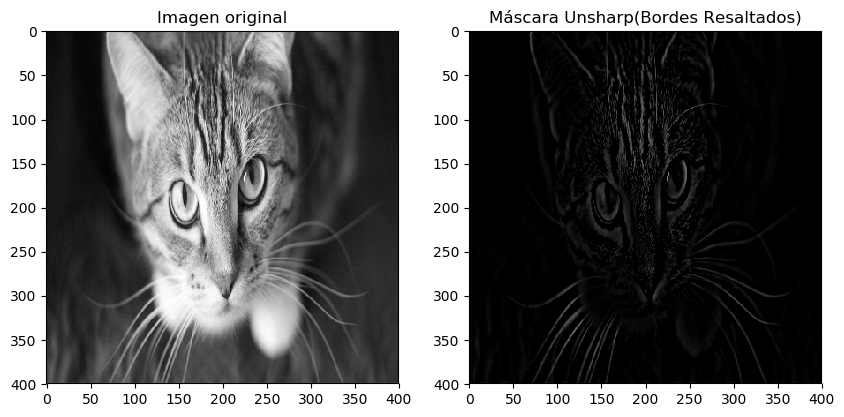

In [76]:
#Leer la imagen de entrada en escala de grises ≈ 1 linea

####SU CODIGO AQUÍ#####
img = img_read("res/gato.jpg", 'gray')
#####TERMINA SU CODIGO#####

#Darle a la imagen el tamaño 400x400 ≈ 1 linea

####SU CODIGO AQUÍ#####
img = cv2.resize(img, (400, 400)).astype(np.uint8)

#####TERMINA SU CODIGO#####

#Dar tamaño al kernel ≈ 1 linea

####SU CODIGO AQUÍ#####
k_size = (25, 25)
#####TERMINA SU CODIGO#####

#Aplicar filtro Gaussiano en opencv: cv2.GaussianBlur(imagen,dimensiones del kernel,sigma) ≈ 1 linea

####SU CODIGO AQUÍ#####
gaussian = cv2.GaussianBlur(img, k_size, cv2.BORDER_CONSTANT)
#####TERMINA SU CODIGO#####

#Crear la máscara que corresponde a la resta entre la imagen original y el filtro gaussiano: utilice cv2.subtract() ≈ 1 linea

####SU CODIGO AQUÍ#####
mascara_unsharp = cv2.subtract(img, gaussian)
#####TERMINA SU CODIGO#####

#Generar un subplot 1x2 para mostrar imagen original, con filtro gaussiano, la máscara y el resultado
fig, arreglo_plots = plt.subplots(1,2, figsize = (10, 15), dpi = 100)

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap = "gray", vmin = 0, vmax = 255)

arreglo_plots[1].set_title('Máscara Unsharp(Bordes Resaltados)')
arreglo_plots[1].imshow(mascara_unsharp, cmap = "gray", vmin = 0, vmax = 255)

### Salida esperada:

<img src= "res/primerpunto.png">

Ahora, finalicemos el realzado sumando la imagen original(imagen de entrada) y la máscara que creamos.

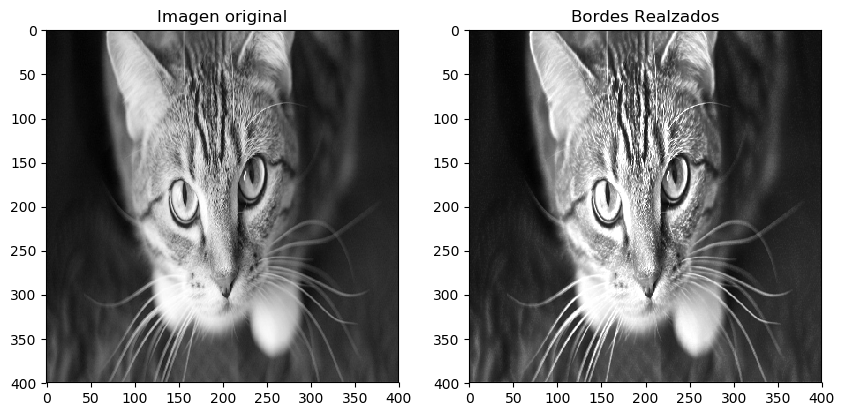

In [77]:
#Sumar la imagen de entrada con la máscara: use cv2.add() ≈ 1 linea

####SU CODIGO AQUÍ#####
res = cv2.add(img, mascara_unsharp)
#####TERMINA SU CODIGO#####

fig, arreglo_plots = plt.subplots(1,2, figsize=(10, 15), dpi = 100)

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap = "gray", vmin = 0, vmax = 255)

arreglo_plots[1].set_title('Bordes Realzados')
arreglo_plots[1].imshow(res, cmap = "gray", vmin = 0, vmax = 255)

### Salida esperada:

<img src = "res/primerpunto2.png">

## 2.

Lea la imagen "res/cuadricula.png" en escala de grises con tipo de dato float32, posteriormente, realice una detección de líneas mediante el método de convolución.

A continuación se muestran las distintas máscaras de convolución que debe utilizar para extraer el borde que necesite.

<img src="res/lines_detector.png\" alt="" style="height:200px">

Implemente la máscara que extrae lineas horizontales y la máscara que extrae lineas a -45°


In [78]:
#Leer la imagen de entrada en escala de grises ≈ 1 linea
#Para dar tipo de dato float32: img_read(filename,"...").astype(np.float32)

####SU CODIGO AQUÍ#####
img = img_read("res/cuadricula.png", 'gray').astype(np.float32)
#####TERMINA SU CODIGO#####

#Implemente la máscara horizontal y la máscara líneas a +45° ≈ 2 lineas

####SU CODIGO AQUÍ#####
mask1 = np.array([[-1., -1, -1], [2., 2., 2.], [-1., -1., -1.]])
mask2 = np.array([[2., -1, -1], [-1., 2., -1], [-1., -1., 2.]])
#####TERMINA SU CODIGO#####

#Imprimir las máscaras

print("La máscara que permite encontrar líneas horizontales es: \n", mask1)

print("La máscara que permite encontrar líneas a -45° es: \n", mask2)

La máscara que permite encontrar líneas horizontales es: 
 [[-1. -1. -1.]
 [ 2.  2.  2.]
 [-1. -1. -1.]]
La máscara que permite encontrar líneas a -45° es: 
 [[ 2. -1. -1.]
 [-1.  2. -1.]
 [-1. -1.  2.]]


### Salida esperada:

<img src = "res/mascaraoutput.png" style="height:150px">

Ahora, aplique la convolución sobre la imagen original utilizando los kernel que implementó, recuerde utilizar la función filter2D de OpenCv (el motivo se vio en la práctica anterior :P).

In [79]:
#Aplique la convolución utilizando cv2.filter2D con ddepth = -1. ≈ 2 lineas

####SU CODIGO AQUÍ#####
imgf1 = cv2.filter2D(img, ddepth = -1, kernel = mask1, borderType = cv2.BORDER_REPLICATE)      #mascara1
imgf2 = cv2.filter2D(img, ddepth = -1, kernel = mask2, borderType = cv2.BORDER_REPLICATE)      #mascara2
#####TERMINA SU CODIGO#####

A continuación, utilice su implementación para detectar las líneas horizontales sobre la cuadrícula

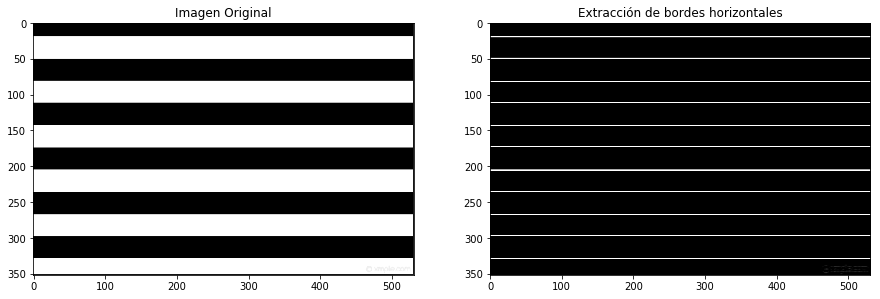

In [80]:
#Llame el filtro que extrae líneas horizontales ≈ 1 linea

####SU CODIGO AQUÍ#####
res = imgf1
#####TERMINA SU CODIGO#####

#Aplicar función img_trim para escalar los valores entre 0 y 255 nuevamente
res = img_trim(res)

#Generar subplot 1x2 y mostrar imagen original e imagen con extracción de bordes
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15, 8))
ax1.set_title('Imagen Original')
ax1.imshow(img, cmap = 'gray')
ax2.set_title('Extracción de bordes horizontales')
ax2.imshow(res, cmap = 'gray') 

### Salida esperada:

<img src="res/output2.png">

Adicionalmente, pruebe que, si intenta encontrar líneas a -45°, el resultado será una imagen vacía.

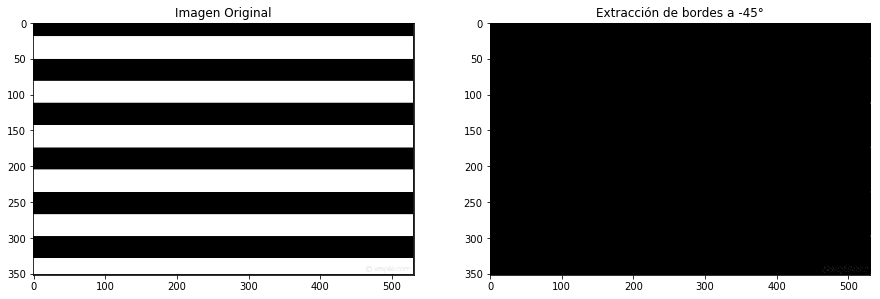

In [81]:
#Llame el filtro que extrae líneas a -45° ≈ 1 linea

####SU CODIGO AQUÍ#####
res = imgf2
#####TERMINA SU CODIGO#####

#Aplicar función img_trim para escalar los valores entre 0 y 255 nuevamente
res = img_trim(res)

#Generar subplot 1x2 y mostrar imagen original e imagen con extracción de bordes
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15, 8))
ax1.set_title('Imagen Original')
ax1.imshow(img, cmap = 'gray')
ax2.set_title('Extracción de bordes a -45°')
ax2.imshow(res, cmap = 'gray') 

### Salida esperada:

<img src="res/output.png">

## 3.

¡Vamos a implementar filtros para extraer bordes!

Basandonos en la teoría de convolución, existen diversos tipos de filtros que pueden aplicarse sobre una imagen para obtener los bordes de ésta.

A continuación, se implementarán 3 filtros distintos.

### Lea la imagen "res/gato.jpg" en escala de grises.

## Filtro Sobel

No olvide leer estas útiles librerías para implementar el filtro Sobel (Y consultarlo en las notas!)

In [32]:
#Importar librerías
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import sobel_v,sobel_h, sobel
import skimage 

A continuación, procederemos con la lectura de la imagen, definiremos los gradientes y finalmente calcularemos la magnitud del gradiente Sobel (que corresponde a los bordes de la imagen original)

## Nota: Recuerde que el tamaño del kernel en el filtro Sobel, es 3x3.

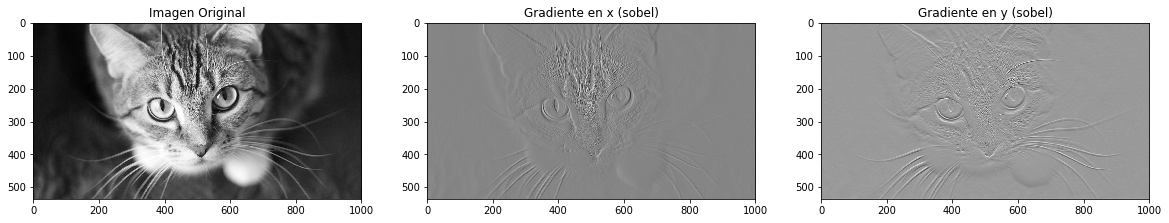

In [83]:
#Leer imagen de entrada con tipo de dato float32  ≈ 1 linea

####SU CODIGO AQUÍ#####
img = img_read("res/gato.jpg", 'gray').astype(np.float32)
#####TERMINA SU CODIGO#####

#La función Sobel recibe: la imagen, el parámetro ddepth, el orden de la derivada que queremos calcular
#en x, el orden de la derivada que queremos calcular en y,  el tamaño del kernel.

#Utilice la función cv2.Sobel(imagen, ddepth=-1, dx,dy,ksize)  ≈ 2 lineas

####SU CODIGO AQUÍ#####
gradiente_x = cv2.Sobel(img, ddepth = -1, dx = 1, dy = 0, ksize = 3)
gradiente_y = cv2.Sobel(img, ddepth = -1, dx = 0, dy = 1, ksize = 3)
#####TERMINA SU CODIGO#####

#Generar subplot 2x2 para mostrar la imagen original, sus gradientes x e y & la magnitud
fig, ax = plt.subplots(1,3, figsize = (20, 20))
ax[0].set_title('Imagen Original')
ax[0].imshow(img, cmap = 'gray')
ax[1].set_title('Gradiente en x (sobel)')
ax[1].imshow(gradiente_x, cmap = 'gray')
ax[2].set_title('Gradiente en y (sobel)')
ax[2].imshow(gradiente_y, cmap = 'gray')

## Salida esperada:

<img src= "res/sobel.png">

Recuerde que la magnitud Sobel se define como cualquier vector:

<h2>MagnitudSobel = $\sqrt(grad_x^2 + grad_y^2)$</h2>

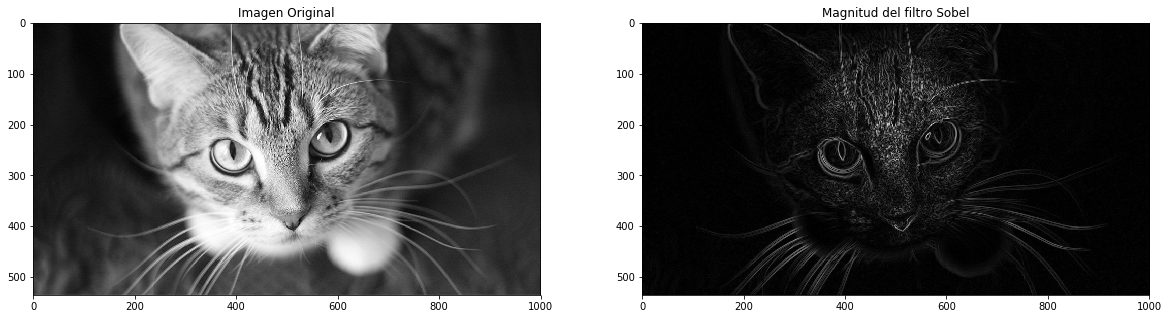

In [84]:
#Calcula la magnitud del sobel, por definición  ≈ 1 linea

####SU CODIGO AQUÍ#####
magnitud_sobel = ((gradiente_x**2)+(gradiente_y**2))**0.5
#####TERMINA SU CODIGO#####

#Realizar el escalamiento de la imagen
magnitud_sobel = img_scale(magnitud_sobel)

fig, ax = plt.subplots(1,2, figsize =(20, 20))
ax[0].set_title('Imagen Original')
ax[0].imshow(img, cmap = 'gray')
ax[1].set_title('Magnitud del filtro Sobel')
ax[1].imshow(magnitud_sobel, cmap = 'gray')

## Salida esperada:

<img src = "res/sobel2.png">

## Filtro Prewitt

¿Qué sucedería si no tenemos a mano una función como cv2.Sobel() que realiza el cálculo utilizando las máscaras adecuadas?

Utilizando la teoría de convolución, y con las máscaras indicadas podemos implementar nuestro propio Filtro Prewitt.

A continuación se presentan las máscaras:

<h2>$\partial_x=\begin{bmatrix}
 -1 & 0 & 1\\ 
 -1 & 0 & 1\\ 
 -1 & 0 & 1
\end{bmatrix}$</h2>
<h2>$\partial_y=\begin{bmatrix}
 -1 & -1 & -1\\ 
 0 & 0 & 0\\ 
 1 & 1 & 1
\end{bmatrix}$</h2>

Inicialmente, realicemos la implementación de las máscaras mostradas anteriormente $\partial_x, \partial_y $

In [85]:
#Crear las máscaras del filtro Prewitt con tipo de dato entero ≈ 2 lineas

####SU CODIGO AQUÍ#####
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
#####TERMINA SU CODIGO#####

print("La máscara Prewitt en X es: \n", prewitt_x)
print("La máscara Prewitt en Y es: \n", prewitt_y)

La máscara Prewitt en X es: 
 [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
La máscara Prewitt en Y es: 
 [[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


## Salida esperada:

<img src = "res/prew.png">

Ahora, leamos la imagen "res/gato.jpg" en escala de grises, apliquemos la convolución con los kernel que acabamos de implementar y veamos el resultado.

Nota:

<h2>MagnitudPrewitt = $\sqrt(convolución_x^2 + convolución_y^2)$</h2>

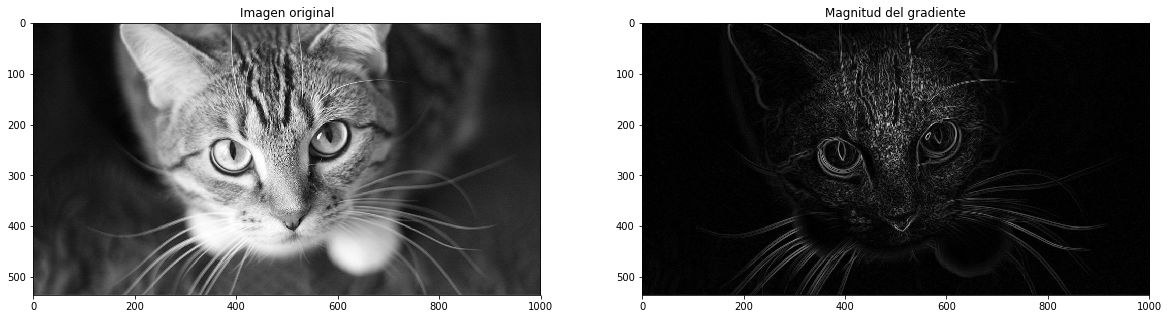

In [86]:
#Leer la imagen de entrada con tipo de dato float32 ≈ 1 linea

####SU CODIGO AQUÍ#####
img = img_read("res/gato.jpg", 'gray').astype(np.float32)
#####TERMINA SU CODIGO#####

#Aplicar la convolución (ddepth = -1) con los kernel en x & y ≈ 2 lineas

####SU CODIGO AQUÍ#####
imgc1 = cv2.filter2D(img, ddepth = -1, kernel = prewitt_x, borderType = cv2.BORDER_REPLICATE)   #convolución con el kernel prewitt_x
imgc2 = cv2.filter2D(img, ddepth = -1, kernel = prewitt_y, borderType = cv2.BORDER_REPLICATE)   #convolución con el kernel prewitt_y
#####TERMINA SU CODIGO#####

#Calcular la magnitud Prewitt ≈ 1 linea

####SU CODIGO AQUÍ#####
magnitud_prewitt = ((imgc1**2)+(imgc2)**2)**0.5
#####TERMINA SU CODIGO#####

#Escalar los datos
magnitud_prewitt = img_scale(magnitud_prewitt)

#Generar un subplot 1x2 para mostrar imagen original y la magnitud del gradiente Prewitt
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20, 20))
ax1.set_title('Imagen original')
ax1.imshow(img, cmap = 'gray')
ax2.set_title('Magnitud del gradiente')
ax2.imshow((magnitud_prewitt), cmap = 'gray')

## Salida esperada:

<img src = "res/prew2.png">

Finalmente, observemos en qué se diferencian las aproximaciones de estos dos filtros.

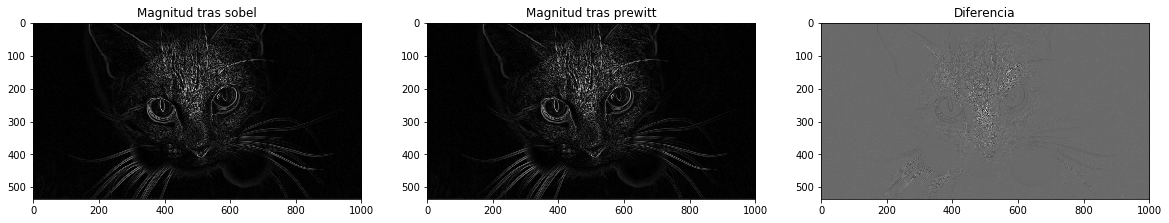

In [87]:
#Restar las magnitudes de los filtros (Sobel-Prewitt) ≈ 1 linea

####SU CODIGO AQUÍ#####
diferencia = magnitud_sobel - magnitud_prewitt
#####TERMINA SU CODIGO#####

#Generar subplot 1x2 para mostrar las magnitudes y su diferencia
fig, ax = plt.subplots(1,3, figsize = (20, 30))
ax[0].set_title('Magnitud tras sobel')
ax[0].imshow(magnitud_sobel, cmap = 'gray')
ax[1].set_title('Magnitud tras prewitt')
ax[1].imshow(magnitud_prewitt, cmap = 'gray')
ax[2].set_title('Diferencia')
ax[2].imshow(diferencia, cmap = 'gray')

## Salida esperada:

<img src = "res/diff.png" alt="" style="height:150px">

## Filtro Frei-Chen

Tal como el filtro Prewitt, este filtro posee sus propias máscaras de convolución.

<h2>$\partial_x=\begin{bmatrix}
 -1 & 0 & 1\\ 
 -\sqrt{2} & 0 & \sqrt{2}\\ 
 -1 & 0 & 1
\end{bmatrix}$</h2>
<h2>$\partial_y=\begin{bmatrix}
 -1 & -\sqrt{2} & -1\\ 
 0 & 0 & 0\\ 
 1 & \sqrt{2} & 1
\end{bmatrix}$</h2>
<br>

A continuación, implemente las máscaras Frei-Chen en X & Y

In [92]:
#Crear las máscaras del filtro Prewitt con tipo de dato entero ≈ 2 lineas

####SU CODIGO AQUÍ#####
sqrt2 = (2**0.5)
freichen_x = np.array([[-1., 0., 1.], [(-sqrt2), 0., (sqrt2)], [-1., 0., 1.]])
freichen_y = np.array([[-1., -sqrt2, -1.], [0., 0., 0.], [1., sqrt2, 1.]])
#####TERMINA SU CODIGO#####

print("La máscara Frei-Chen en X es: \n", freichen_x)
print("La máscara Frei-Chen en Y es: \n", freichen_y)

La máscara Frei-Chen en X es: 
 [[-1.          0.          1.        ]
 [-1.41421356  0.          1.41421356]
 [-1.          0.          1.        ]]
La máscara Frei-Chen en Y es: 
 [[-1.         -1.41421356 -1.        ]
 [ 0.          0.          0.        ]
 [ 1.          1.41421356  1.        ]]


## Salida esperada:

<img src= "res/freimask.png">

### Lea la imagen "res/pez.jpg" en escala de grises

<h2>MagnitudFreichen = $\sqrt(convolución_x^2 + convolución_y^2)$</h2>

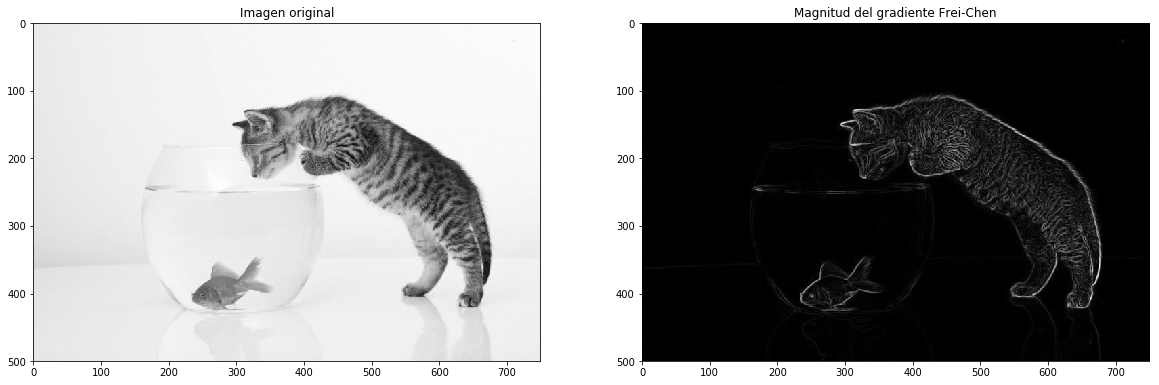

In [112]:
#Leer la imagen de entrada  ≈ 1 linea

####SU CODIGO AQUÍ#####
img = img_read("res/pez.jpg", 'gray').astype(np.float32)
#####TERMINA SU CODIGO#####

#Convolucionar la imagen de entrada con los filtros freichen_x y freichen_y ≈ 2 lineas

####SU CODIGO AQUÍ#####
imgc1 = cv2.filter2D(img, ddepth = -1, kernel = freichen_x, borderType = cv2.BORDER_REPLICATE) #convolución freichen_x
imgc2 = cv2.filter2D(img, ddepth = -1, kernel = freichen_y, borderType = cv2.BORDER_REPLICATE) #convolución freichen_y
#####TERMINA SU CODIGO#####

#Calcular la magnitud ≈ 1 linea

####SU CODIGO AQUÍ#####
magnitud_freichen = ((imgc1)**2 + (imgc2)**2)**0.5
#####TERMINA SU CODIGO#####

#Escalar los datos
magnitud_freichen = img_scale(magnitud_freichen)

#Generar un subplot 1x2 para mostrar imagen original y la magnitud del gradiente Freichen
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20, 20))
ax1.set_title('Imagen original')
ax1.imshow(img, cmap = 'gray')
ax2.set_title('Magnitud del gradiente Frei-Chen')
ax2.imshow(magnitud_freichen, cmap = 'gray')

## Salida esperada:

<img src = "res/gradfreichen.png">

## 4.

Ahora que sabemos cómo implementar operadores basados en la primera derivada, veamos cómo funcionan los operadores de Segunda Derivada.

Dada la ausencia de dos gradientes, estos operadores se implementan mediante una única convolución.

## El filtro de la Laplaciana

<h2>$\nabla^2f(x,y)=\frac{\partial^2f}{\partial_x^2}+\frac{\partial^2f}{\partial_y^2}$</h2>

Utilizando las siguientes máscaras de convolución, implementemos el Filtro de la Laplaciana. Las llamaremos máscara 1 y máscara 2 respectivamente.

<h2>$\nabla^2f=f*\begin{bmatrix}
 1 & -2 & 1\\ 
 -2 & 4 & -2\\ 
 1 & -2 & 1
\end{bmatrix}$</h2>

<h2>$\nabla^2f=f*\begin{bmatrix}
 -1 & -1 & -1\\ 
 -1 & 8 & -1\\ 
 -1 & -1 & -1
\end{bmatrix}$</h2>

Lea la imagen "res/botones.jpg" en escala de grises.

In [114]:
#Leer imagen de entrada en escala de grises  ≈ 1 linea

####SU CODIGO AQUÍ#####
img = img_read("res/botones.jpg", 'gray').astype(np.float32)
#####TERMINA SU CODIGO#####

#Crear las máscaras de convolución  ≈ 2 lineas

####SU CODIGO AQUÍ#####
mask1 = np.array([[1, -2, 1], [-2, 4, -2], [1, -2, 1]]) #máscara 1
mask2 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]) #máscara 2
#####TERMINA SU CODIGO#####

print("La máscara de convolución 1 en X es: \n", mask1)
print("La máscara de convolucion 2 es: \n", mask2)

La máscara de convolución 1 en X es: 
 [[ 1 -2  1]
 [-2  4 -2]
 [ 1 -2  1]]
La máscara de convolucion 2 es: 
 [[-1 -1 -1]
 [-1  8 -1]
 [-1 -1 -1]]


## Salida esperada:

<img src = "res/mascaralaplaciana.png">

Ahora, realizaremos las dos convoluciones respectivas y observaremos los resultados.

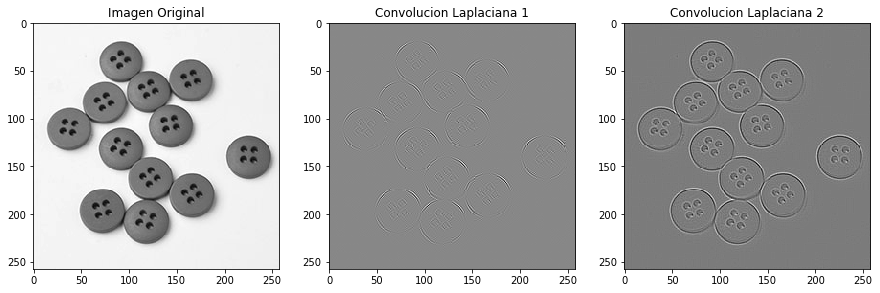

In [115]:
#Realizar la convolución ≈ 2 lineas

####SU CODIGO AQUÍ#####
laplace_filtered1 = cv2.filter2D(img, ddepth = -1, kernel = mask1, borderType = cv2.BORDER_REPLICATE) #Convolución máscara 1
laplace_filtered2 = cv2.filter2D(img, ddepth = -1, kernel = mask2, borderType = cv2.BORDER_REPLICATE) #Convolución máscara 2
#####TERMINA SU CODIGO#####

#Generar subplot 1x3 para mostrar imagen original y convolución Laplaciana
fig, ax = plt.subplots(1,3, figsize=(15, 8))
ax[0].set_title('Imagen Original')
ax[0].imshow(img, cmap = 'gray')
ax[1].set_title('Convolucion Laplaciana 1')
ax[1].imshow(laplace_filtered1, cmap = 'gray')
ax[2].set_title('Convolucion Laplaciana 2')
ax[2].imshow(laplace_filtered2, cmap = 'gray')

## Salida esperada:

<img src = "res/convolucionlaplaciana.png">

Aun así, no se pueden apreciar correctamente los bordes de los botones. Aunque es un buen acercamiento, podemos mejorarlo.

Para ello utilizaremos un método denominado, Laplaciana de la Gaussiana. Tal como su nombre lo indica, primero se aplica un filtro Gaussiano a la imagen de entrada, posteriormente un Laplaciano, en ese orden.

Implementemos una Laplaciana de la Gaussiana para diferenciar correcta y claramente los botones en la imagen.

### El kernel es de tamaño 25x25 y el sigma = 1.8

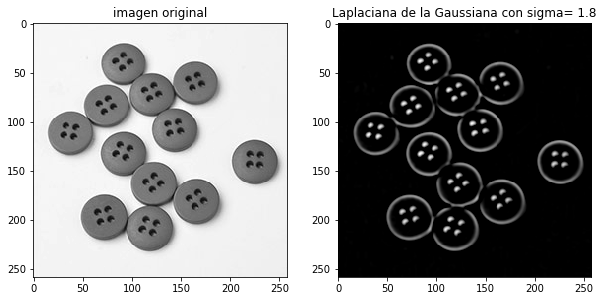

In [117]:
#Leer la imagen de entrada en escala de grises y tipo de dato float32 ≈ 1 linea

####SU CODIGO AQUÍ#####
img = img_read("res/botones.jpg", 'gray').astype(np.float32)
#####TERMINA SU CODIGO#####

#Definir sigma y el tamaño del kernel ≈ 2 lineas

####SU CODIGO AQUÍ#####
sigma = 1.8
k_size = (25, 25)
#####TERMINA SU CODIGO#####

#Aplicar un filtro Gaussiano sobre la imagen ≈ 1 linea

####SU CODIGO AQUÍ#####
res = cv2.GaussianBlur(img, k_size, sigma)
#####TERMINA SU CODIGO#####

#Aplicar un laplaciano sobre la imagen filtrada (res), utilice cv2.Laplacian, 
#con parámetros ddepth = -1 y ksize=3 ≈ 1 linea

####SU CODIGO AQUÍ#####
res = cv2.Laplacian(res, ddepth = -1, ksize = 3)
#####TERMINA SU CODIGO#####

#Escalar los valores menores a 0 y mayores que 255
res = img_trim(res)

#Generar un subplot para mostrar imagen original y la Laplaciana de la Gaussiana 
fig2, ax = plt.subplots(1,2, figsize = (10, 7))
ax[0].set_title('imagen original')
ax[0].imshow(img, cmap = 'gray')
ax[1].set_title('Laplaciana de la Gaussiana con sigma= ' + str(sigma))
ax[1].imshow(res, cmap = 'gray')

## Salida esperada:

<img src = "res/lapga.png">

Finalmente, veamos una demostración de la Transformada de Hough probabilística para líneas (Existe otra versión para círculos, revisar en las notas)

Recuerde que para aplicar correctamente la transformada de Hough, primero debe aplicar un Filtro Canny sobre la imagen.

Lea la imagen "res/cuadricula.png" en RGB.

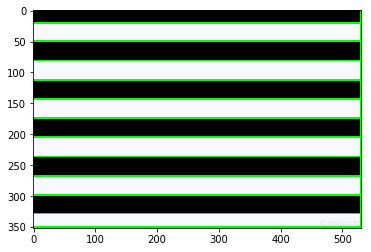

In [123]:
#Leer imagen de entrada en RGB ≈ 1 linea

####SU CODIGO AQUÍ#####
img = img_read("res/cuadricula.png", 'color')
#####TERMINA SU CODIGO#####

#Aplicar filtro Canny, threshold sugerido: 0 y 10 ≈ 1 linea

####SU CODIGO AQUÍ#####
edges = cv2.Canny(img, 0, 10)
#####TERMINA SU CODIGO#####

#Aplicar la transformada probabilistica de Hough y hallar los puntos x1,y1,x2,y2
#por los que pasa la línea recta
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=100, maxLineGap=10)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1,y1), (x2,y2), (0,255,0), 2)
    
#Mostrar la imagen
plt.imshow(img, cmap='gray')

## Salida esperada:

<img src = "res/hough.png">

Se aprecian las líneas verdes, que resaltan precisamente toda las líneas presentes en la imagen.

## Transformada de Hough para círculos

¿Por qué no identificamos los círculos externos de los botones con la transformada de Hough? Podría sernos de gran utilidad. 

A continuación, implementemos un algoritmo que nos permita llegar a nuestro objetivo.

Lea la imagen "res/botones.jpg" en escala de grises.

### Sugerencia, pruebe: 0 < parámetro1 < 25 & 25 < parámetro2 < 50

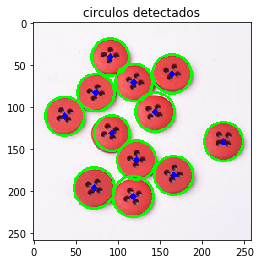

In [177]:
#Leer la imagen de entrada en escala de grises ≈ 1 linea

####SU CODIGO AQUÍ#####
img = img_read("res/botones.jpg", 'gray').astype(np.uint8)
cimg = img_read("res/botones.jpg", 'color')
#####TERMINA SU CODIGO#####

#Aplicar un filtro de mediana a la imagen con 5 iteraciones ≈ 1 linea

####SU CODIGO AQUÍ#####
img = cv2.medianBlur(img, 5)
#####TERMINA SU CODIGO#####

#Definir los parámetros de la transformada de Hough. parámetro1 < parámetro2  ≈ 2 lineas

####SU CODIGO AQUÍ#####
parametro1 = 25
parametro2 = 45
#####TERMINA SU CODIGO#####

#Aplicar la Transformada de Hough para círculos
#https://docs.opencv.org/3.4.2/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d
circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20, param1 = parametro1, param2 = parametro2, minRadius = 0, maxRadius = 0)

#Redondear y convertir a tipo de dato uint16, recuerde utilizar: np.uint16(...)

####SU CODIGO AQUÍ#####
circles = np.uint16(circles)
#####TERMINA SU CODIGO#####

#Dibujar los círculos recorriendo cada posición i del vector circles(0,:)
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg, (i[0], i[1]), i[2], (0, 255, 0), 2)
    # draw the center of the circle
    cv2.circle(cimg, (i[0], i[1]), 2, (0, 0, 255), 3)
    
#Dibujar la imagen original y los círculos detectados
plt.title('circulos detectados')
plt.imshow(cimg)

## Salida esperada:

<img src = "res/hard.png">

## Detección de esquinas (El algoritmo Harris)

A continuación, observaremos el algoritmo Harris en funcionamiento para encontrar las esquinas dentro de una imagen.

Lea la imagen "res/chess.jpg" en escala de grises con tipo de dato float32, posteriormente cree un kernel cuyas componentes únicamente son 1, de tamaño 7x7.

Documentación disponible en:

https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html

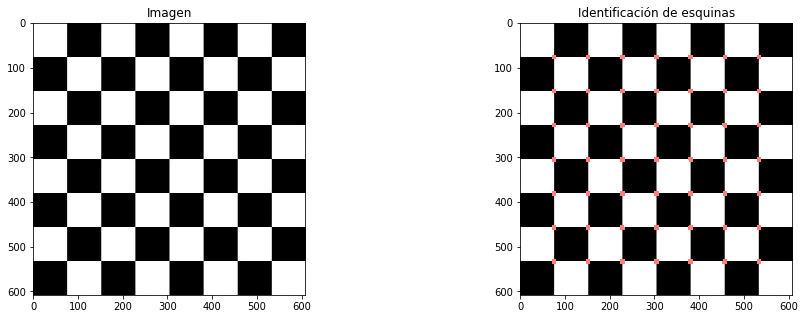

In [172]:
# Cargar la imagen en escala de grises con tipo de dato float32 ≈ 1 linea

####SU CODIGO AQUÍ#####
gray = img_read("res/chess.jpg", 'gray').astype(np.float32)
image = img_read("res/chess.jpg", 'color')
#####TERMINA SU CODIGO#####

### Apply cornerHarris function
harris_corners = cv2.cornerHarris(gray, 3, 3, 0.05)

#We use dilation of the corner points to enlarge them\

#Crear el kernel (matriz de 1 (unos)), de tamaño 7x7 y tipo de dato uint8 ≈ 1 linea

####SU CODIGO AQUÍ#####
kernel = np.ones((7,7), np.uint8)
#####TERMINA SU CODIGO#####

harris_corners = cv2.dilate(harris_corners, kernel)

# Threshold for an optimal value, it may vary depending on the image.
image[harris_corners > 0.025 * harris_corners.max() ] = [255, 127, 127]

#Generar un subplot 1x2 y mostrar imagen junto a segmentación por K-means
fig, ax = plt.subplots(1,2, figsize=(16, 5))

ax[0].set_title('Imagen')
ax[0].imshow(gray, cmap='gray')
ax[1].set_title('Identificación de esquinas')
ax[1].imshow(image)

## Salida esperada:

<img src = "res/corner.png">

## 5.

## Segmentación por Umbralización

Lea la imagen "res/botones.jpg" en escala de grises.

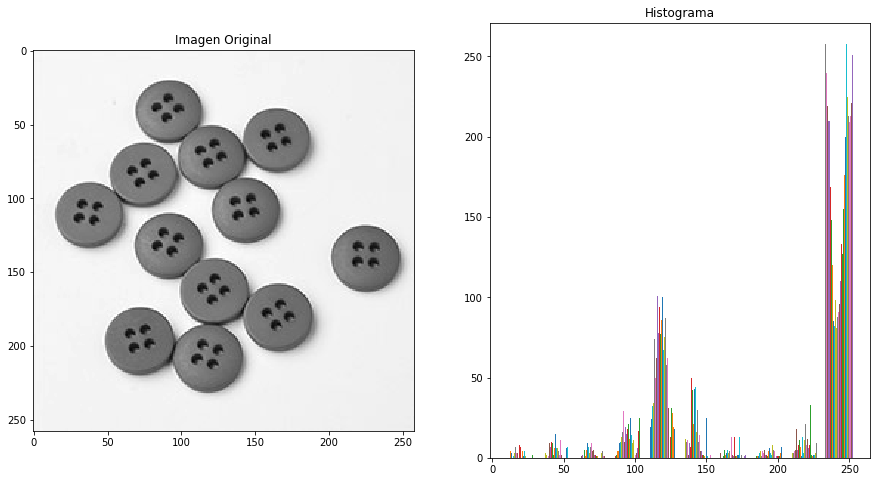

In [179]:
#Leer la imagen de entrada con tipo de dato uint8 ≈ 1 linea

####SU CODIGO AQUÍ#####
img = img_read("res/botones.jpg", 'gray').astype(np.uint8)
#####TERMINA SU CODIGO#####

#Generar subplot 1x2  que muestre imagen e histograma
fig, ax = plt.subplots(1,2, figsize=(15, 8))
ax[0].set_title('Imagen Original')
ax[0].imshow(img, cmap='gray')
ax[1].set_title('Histograma')
ax[1].hist(img);

## Salida esperada: 

<img src = "res/his.png">

Queremos separar los botones del fondo, recordemos a qué equivale el color Blanco(y los colores que se acercan a el por tener mucho brillo) en el espacio de color RGB, y a qué equivale el color negro.

A continuación, vamos a binarizar la imagen.

### ImagenBinarizada = ImagenEntrada > X

Donde 0 < X < 255, esto permite discriminar rápidamente los píxeles basados en el histograma de la imagen.

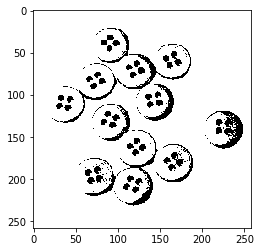

In [187]:
#Con base en su observación del histograma, discrimine y binarice. ≈ 1 linea

####SU CODIGO AQUÍ#####
binarizada = cv2.threshold(img, 110, 150, cv2.THRESH_BINARY)[1]
#####TERMINA SU CODIGO#####

#Mostrar la nueva imagen
plt.imshow(binarizada, cmap="gray")

## Salida esperada (debe obtener un aproximado):

<img src = "res/aprox.png">

OpenCv ofrece distintos métodos para umbralizar por threshold, aprendamos a utilizar la función cv2.threshold.

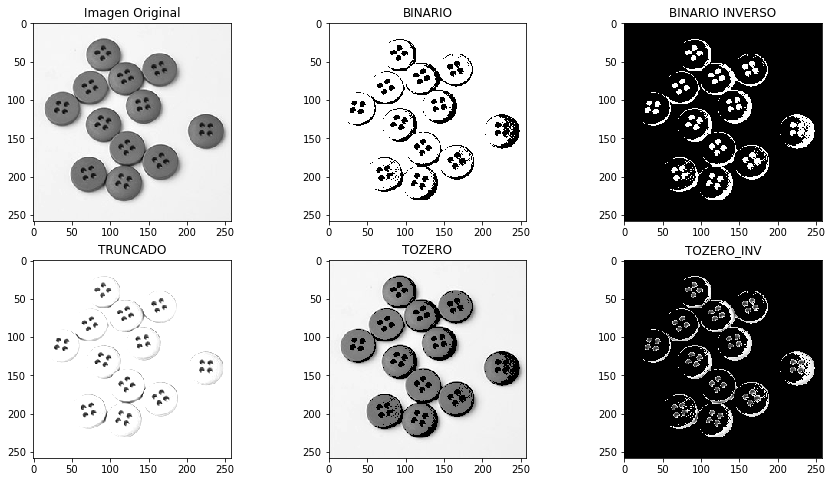

In [183]:
#Definir un valor mínimo para la umbralización con base en sus observaciones ≈ 1 linea

####SU CODIGO AQUÍ#####
val = 110
#####TERMINA SU CODIGO#####

#Generar mediante la función threshold de cv2, las distintas aproximaciones que 
#se ofrecen en la figura anterior
ret,thresh1 = cv2.threshold(img,val,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,val,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,val,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,val,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,val,255,cv2.THRESH_TOZERO_INV)

#Dar título a las imágenes y hacer una lista de éstas
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

#Generar un subplot 2x3 que muestre todas las umbralizaciones y la imagen original
fig, ax = plt.subplots(2,3, figsize=(15, 8))
ax[0][0].set_title('Imagen Original')
ax[0][0].imshow(img, cmap='gray')
ax[0][1].set_title('BINARIO')
ax[0][1].imshow(thresh1, cmap='gray')
ax[0][2].set_title('BINARIO INVERSO')
ax[0][2].imshow(thresh2, cmap='gray')
ax[1][0].set_title('TRUNCADO')
ax[1][0].imshow(thresh3, cmap='gray')
ax[1][1].set_title('TOZERO')
ax[1][1].imshow(thresh4, cmap='gray')
ax[1][2].set_title('TOZERO_INV')
ax[1][2].imshow(thresh5, cmap='gray')

## Salida esperada (debe obtener un aproximado):

<img src = "res/umbral.png">

## ¿Con qué umbralización separaría usted los botones del fondo? ¿Por qué?

#### **Respuesta:** 

Probablemente los separaría utilizando la umbralización *Trunc* o  *Tozero*, porque según lo mostrado en los resultados anteriores, son los umbrales donde se muestran, de una manera más definida, los bordes de los botones y el cambio que se presenta en las tonalidades (intensidades) entre los colores de los botones y el fondo de la imagen.

Ahora bien, en las notas puede revisarse que la umbralización no es exclusivamente binaria.

A continuación, estudiaremos la Umbralización por Otsu.

## Umbralización por Otsu

Lea la imagen "res/botones.jpg" en escala de grises. Recuerde que Otsu es un tipo de umbralización adaptativo, no es sugerible utilizarlo si el histograma no permite separación (en este caso, hemos probado que nuestra imagen permite separación)

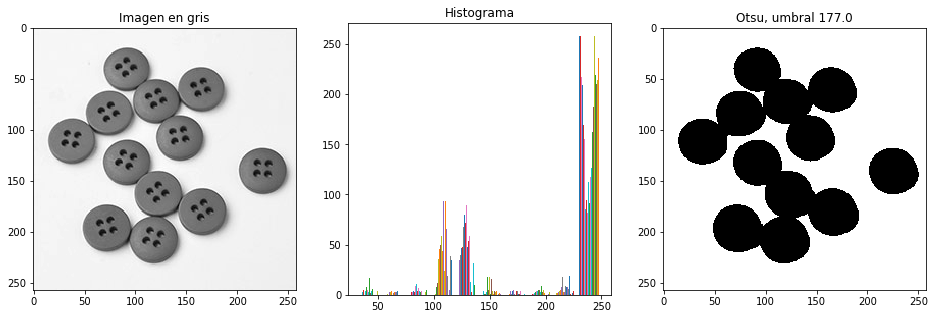

In [188]:
#Leer imagen de entrada en escala de grises ≈ 1 linea

####SU CODIGO AQUÍ#####
img = img_read("res/botones.jpg", 'gray').astype(np.uint8)
#####TERMINA SU CODIGO#####

#Aplicar filtro de mediana con 5 iteraciones ≈ 1 linea

####SU CODIGO AQUÍ#####
blurred = cv2.medianBlur(img, 5)
#####TERMINA SU CODIGO#####

#Realizar una umbralización Otsu y asignar valores entre 0 y 255≈ 1 linea

####SU CODIGO AQUÍ#####
ret1,th1 = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
#####TERMINA SU CODIGO#####

#Generar un subplot 1x3 que muestre imagen en gris, histograma y Umbralización Otsu
fig, ax = plt.subplots(1,3, figsize=(16, 5))

ax[0].set_title('Imagen en gris')
ax[0].imshow(img, cmap='gray')
ax[1].set_title('Histograma')
ax[1].hist(blurred)
ax[2].set_title('Otsu, umbral ' + str(ret1))
ax[2].imshow(th1, cmap='gray')

## Salida esperada:

<img src = "res/umbrals.png">

Se puede ver el umbral seleccionado por Otsu, a la vez, la segmentación total de las figuras.

Finalmente, la segmentación por K-Means o basada en regiones, es un tipo de segmentación más poderosa(Consultar en las notas)

Lea la imagen "res/cookies.png" en RGB.

No dude en experimentar con los valores de K, una sugerencia es empezar en K = 2 y aumentar de 1 en 1 hasta K = 10 o K = 20.

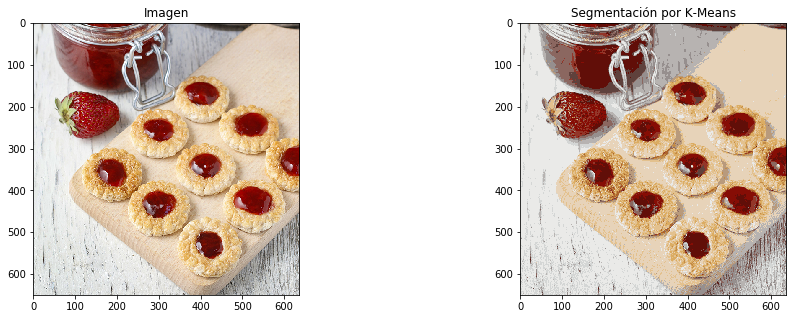

In [140]:
#Leer imagen de entrada a color ≈ 1 linea

####SU CODIGO AQUÍ#####
img = img_read("res/cookies.png", 'color')
#####TERMINA SU CODIGO#####

#Reorganizar la imagen de entrada y darle unidades flotantes
Z = img.reshape((-1,3))
Z = np.float32(Z)

# definir criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#Seleccione una K adecuada ≈ 1 linea

####SU CODIGO AQUÍ##### 
K = 15
#####TERMINA SU CODIGO#####

ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

#Volver a tipo de dato uint8 y mostrar la imagen
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

#Generar un subplot 1x2 y mostrar imagen junto a segmentación por K-means
fig, ax = plt.subplots(1,2, figsize=(16, 5))

ax[0].set_title('Imagen')
ax[0].imshow(img, cmap='gray')
ax[1].set_title('Segmentación por K-Means')
ax[1].imshow(res2, cmap='gray')

## Salida esperada:

<img src = "res/cooks.png">